<a href="https://colab.research.google.com/github/Lungelo-cloud/Hub-Analytics/blob/main/Hub_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 

In [ ]:
sheet_id = '1WGVWOsjKdp4eP_6PcqdnU7r6r8RW0hAtUVakTlrFWxw'

In [ ]:
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")

In [ ]:
df.head()

,Timestamp,Full Name,Phone Number,Sign-in Time,What are you working on today? (We ask this to understand what type of work is being done at The Hub),What equipment will you use?,Internet?,Sign-out Time (estimate),Are you a member of The Hub?
0,2/11/2021,Kwanele Prince Tsabedze,7815 8606,11:00:00 AM,"FInancials, among other things",BYOC,Shared Hotspot,6:00:00 AM,NaN
1,2/11/2021,Simanga Ntsini,78501932,4:00:00 AM,EDITING VIDS,Desktop Workstation,Shared Hotspot,NaN,NaN
2,2/13/2021,Simanga Ntsini,78501932,11:00:00 AM,Sharing videos to my platforms,Mac Workstation,Shared Hotspot,NaN,NaN
3,2/13/2021,TygaDoesIt,+26879384734,11:45:00 AM,album art work,Own P.C,Shared Hotspot,7:00:00 PM,NaN
4,2/14/2021,Gcinimiyalo Ntuli,76342236,12:56:00 PM,Editing a video for my YouTube channel,Mac Workstation,Shared Hotspot,16:38:00,NaN


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,Full Name,Phone Number,Sign-in Time,What are you working on today? (We ask this to understand what type of work is being done at The Hub),What equipment will you use?,Internet?,Sign-out Time (estimate),Are you a member of The Hub?
0,2021-02-11,Kwanele Prince Tsabedze,7815 8606,11:00:00 AM,"FInancials, among other things",BYOC,Shared Hotspot,6:00:00 AM,NaN
1,2021-02-11,Simanga Ntsini,78501932,4:00:00 AM,EDITING VIDS,Desktop Workstation,Shared Hotspot,NaN,NaN
2,2021-02-13,Simanga Ntsini,78501932,11:00:00 AM,Sharing videos to my platforms,Mac Workstation,Shared Hotspot,NaN,NaN
3,2021-02-13,TygaDoesIt,+26879384734,11:45:00 AM,album art work,Own P.C,Shared Hotspot,7:00:00 PM,NaN
4,2021-02-14,Gcinimiyalo Ntuli,76342236,12:56:00 PM,Editing a video for my YouTube channel,Mac Workstation,Shared Hotspot,16:38:00,NaN


In [ ]:
df.dtypes

Timestamp                                                                                                datetime64[ns]
Full Name                                                                                                        object
Phone Number                                                                                                     object
Sign-in Time                                                                                                     object
What are you working on today? (We ask this to understand what type of work is being done at The Hub)            object
What equipment will you use?                                                                                     object
Internet?                                                                                                        object
Sign-out Time (estimate)                                                                                         object
Are you a member of The Hub?            

In [ ]:
missing_data = df.isnull()
missing_data.head()

,Timestamp,Full Name,Phone Number,Sign-in Time,What are you working on today? (We ask this to understand what type of work is being done at The Hub),What equipment will you use?,Internet?,Sign-out Time (estimate),Are you a member of The Hub?
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True


In [ ]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

Timestamp
False    404
Name: Timestamp, dtype: int64

Full Name
False    404
Name: Full Name, dtype: int64

Phone Number
False    404
Name: Phone Number, dtype: int64

Sign-in Time
False    404
Name: Sign-in Time, dtype: int64

What are you working on today? (We ask this to understand what type of work is being done at The Hub)
False    404
Name: What are you working on today? (We ask this to understand what type of work is being done at The Hub), dtype: int64

What equipment will you use?
False    404
Name: What equipment will you use?, dtype: int64

Internet?
False    403
True       1
Name: Internet?, dtype: int64

Sign-out Time (estimate)
False    383
True      21
Name: Sign-out Time (estimate), dtype: int64

Are you a member of The Hub?
False    301
True     103
Name: Are you a member of The Hub?, dtype: int64



In [ ]:
mode_sign_out_time = df['Sign-out Time (estimate)'].mode(dropna = True)
mode_internet = df['Internet?'].mode(dropna = True)
mode_if_member = df['Are you a member of The Hub?'].mode(dropna = True)
print('mode sign out time: \n',mode_sign_out_time)
print('')
print('mode internet: \n',mode_internet)
print('')
print('mode of member: \n',mode_if_member)

mode sign out time: 
 0    5:00:00 PM
dtype: object

mode internet: 
 0    Shared Hotspot
dtype: object

mode of member: 
 0    Yes
dtype: object


In [ ]:
df['Sign-out Time (estimate)'] = df['Sign-out Time (estimate)'].replace(np.nan, '5:00:00 PM')
df['Internet?'] = df['Internet?'].replace(np.nan, 'Shared Hotspot')
df['Are you a member of The Hub?'] = df['Are you a member of The Hub?'].replace(np.nan, 'Yes')

In [ ]:
df.head()

,Timestamp,Full Name,Phone Number,Sign-in Time,What are you working on today? (We ask this to understand what type of work is being done at The Hub),What equipment will you use?,Internet?,Sign-out Time (estimate),Are you a member of The Hub?
0,2021-02-11,Kwanele Prince Tsabedze,7815 8606,11:00:00 AM,"FInancials, among other things",BYOC,Shared Hotspot,6:00:00 AM,Yes
1,2021-02-11,Simanga Ntsini,78501932,4:00:00 AM,EDITING VIDS,Desktop Workstation,Shared Hotspot,5:00:00 PM,Yes
2,2021-02-13,Simanga Ntsini,78501932,11:00:00 AM,Sharing videos to my platforms,Mac Workstation,Shared Hotspot,5:00:00 PM,Yes
3,2021-02-13,TygaDoesIt,+26879384734,11:45:00 AM,album art work,Own P.C,Shared Hotspot,7:00:00 PM,Yes
4,2021-02-14,Gcinimiyalo Ntuli,76342236,12:56:00 PM,Editing a video for my YouTube channel,Mac Workstation,Shared Hotspot,16:38:00,Yes


In [ ]:
date_groups = df.groupby(df['Timestamp'])

In [ ]:
df.columns

Index(['Timestamp', 'Full Name', 'Phone Number', 'Sign-in Time',
       'What are you working on today? (We ask this to understand what type of work is being done at The Hub)',
       'What equipment will you use?', 'Internet?', 'Sign-out Time (estimate)',
       'Are you a member of The Hub?'],
      dtype='object')

In [ ]:
df['Sign-in Time'] = pd.to_datetime(df['Sign-in Time'])
df['Sign-out Time (estimate)'] = pd.to_datetime(df['Sign-out Time (estimate)'])
df.head()

,Timestamp,Full Name,Phone Number,Sign-in Time,What are you working on today? (We ask this to understand what type of work is being done at The Hub),What equipment will you use?,Internet?,Sign-out Time (estimate),Are you a member of The Hub?
0,2021-02-11,Kwanele Prince Tsabedze,7815 8606,2021-08-04 11:00:00,"FInancials, among other things",BYOC,Shared Hotspot,2021-08-04 06:00:00,Yes
1,2021-02-11,Simanga Ntsini,78501932,2021-08-04 04:00:00,EDITING VIDS,Desktop Workstation,Shared Hotspot,2021-08-04 17:00:00,Yes
2,2021-02-13,Simanga Ntsini,78501932,2021-08-04 11:00:00,Sharing videos to my platforms,Mac Workstation,Shared Hotspot,2021-08-04 17:00:00,Yes
3,2021-02-13,TygaDoesIt,+26879384734,2021-08-04 11:45:00,album art work,Own P.C,Shared Hotspot,2021-08-04 19:00:00,Yes
4,2021-02-14,Gcinimiyalo Ntuli,76342236,2021-08-04 12:56:00,Editing a video for my YouTube channel,Mac Workstation,Shared Hotspot,2021-08-04 16:38:00,Yes


In [ ]:
#df['Sign-in Time'] = df['Sign-in Time'].dt.strftime('%H:%M:%S')
#df['Sign-out Time (estimate)'] = df['Sign-out Time (estimate)'].dt.strftime('%H:%M:%S')
#df.head()

,Timestamp,Full Name,Phone Number,Sign-in Time,What are you working on today? (We ask this to understand what type of work is being done at The Hub),What equipment will you use?,Internet?,Sign-out Time (estimate),Are you a member of The Hub?
0,2021-02-11,Kwanele Prince Tsabedze,7815 8606,11:00:00,"FInancials, among other things",BYOC,Shared Hotspot,06:00:00,Yes
1,2021-02-11,Simanga Ntsini,78501932,04:00:00,EDITING VIDS,Desktop Workstation,Shared Hotspot,17:00:00,Yes
2,2021-02-13,Simanga Ntsini,78501932,11:00:00,Sharing videos to my platforms,Mac Workstation,Shared Hotspot,17:00:00,Yes
3,2021-02-13,TygaDoesIt,+26879384734,11:45:00,album art work,Own P.C,Shared Hotspot,19:00:00,Yes
4,2021-02-14,Gcinimiyalo Ntuli,76342236,12:56:00,Editing a video for my YouTube channel,Mac Workstation,Shared Hotspot,16:38:00,Yes


In [ ]:
df['What equipment will you use?'].value_counts()

Own workstation        174
Mac Workstation        108
Desktop Workstation     76
Other                   15
Projector               14
Camera                  12
Network                  1
Desk and plug            1
Keyboard                 1
Name: What equipment will you use?, dtype: int64

In [ ]:
df['Full Name'].value_counts()

Gcinimiyalo Ntuli          53
Lungelo Mamba              39
Fanelesibonge Malaza       34
Tsabedze Kwanele Prince    34
Shongwe Mlungisi           26
                           ..
Sabelo                      1
TygaDoesIt                  1
Shongwe Mlungisi L.         1
Sabelo s Vilakati           1
Tsabedze Sibusiso           1
Name: Full Name, Length: 64, dtype: int64

In [ ]:
df['Internet?'].value_counts()

Shared Hotspot    336
Own internet       66
Name: Internet?, dtype: int64

In [ ]:
df['Internet?'].replace('BYOI', 'Own internet', inplace=True)
df['Internet?'].replace('Brought my own internet', 'Own internet', inplace=True)

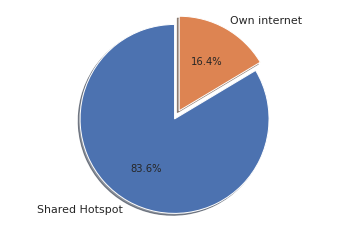

In [ ]:
pie1_labels = 'Shared Hotspot', 'Own internet' 
sizes1_labels = df['Internet?'].value_counts()
explode = (0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes1_labels, explode=explode, labels=pie1_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
     print(df['Full Name'].value_counts())

Gcinimiyalo Ntuli            53
Lungelo Mamba                39
Fanelesibonge Malaza         34
Tsabedze Kwanele Prince      34
Shongwe Mlungisi             26
Hlophe Nombuso               25
Lution                       20
Simanga Ntsini               15
Zack Towindo                 13
Bagcinele Fakudze            10
Lwazi Mkhaliphi               8
Nomalungelo                   8
Kwanele Prince Tsabedze       6
Nxumalo Thobeka               6
Thobeka Nxumalo               5
Shongwe Mlungisi              5
Sabelo Vilakati               5
MLUNGISI SHONGWE              5
Muzi Mathunjwa                5
Tsabedze Sibusiso             5
Zack towindo                  5
Sibahle Mnyakeni              4
Gcinimiyalo Ntuli             4
zack towindo                  4
Fanelesibonge Malaza          4
Tygadoesit                    3
Thobeka Nxumalo               3
Sabelo S Vilakati             3
Sabelo S Vilakati             2
Percy Tembe                   2
Sabelo                        2
Tsabedze

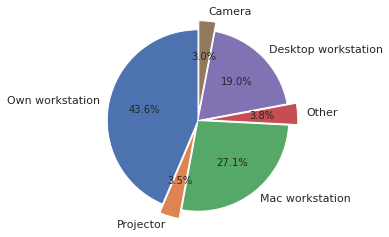

In [ ]:
pie_labels = 'Own workstation' , 'Projector', 'Mac workstation', 'Other', 'Desktop workstation', 'Camera'
sizes_labels = [174, 14, 108, 15, 76, 12]
explode = (0,0.1,0,0.1,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes_labels, explode=explode, labels=pie_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df[df['What equipment will you use?']=='work']

,Full Name,Phone Number,Sign-in Time,What are you working on today? (We ask this to understand what type of work is being done at The Hub),What equipment will you use?,Internet?,Sign-out Time (estimate),Are you a member of The Hub?,part_of_day
Timestamp,,,,,,,,,


In [ ]:
df['What equipment will you use?'].replace('Brought my own workstation', 'Own workstation', inplace=True)

In [ ]:
df['part_of_day']=pd.cut(df['Sign-in Time'].dt.hour,
                            [0,12,17,20,23],
                            labels=['Morning','Afternoon','Evening','Night'],
                            include_lowest=True)

In [ ]:
df['part_of_day'].value_counts()

Morning      277
Afternoon    110
Evening       12
Night          3
Name: part_of_day, dtype: int64

In [ ]:
session = ['Morning','Afternoon','Evening','Night']

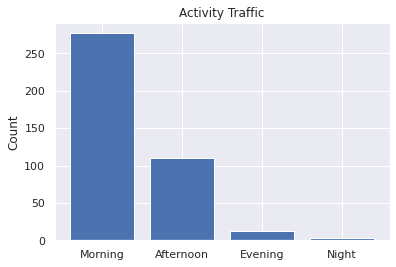

In [ ]:
%matplotlib inline
plt.bar(session, df["part_of_day"].value_counts());
#plt.xlabel("part of the day")
plt.ylabel("Count")
plt.title("Activity Traffic");

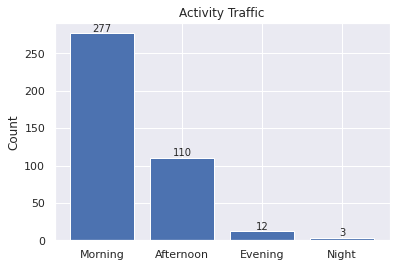

In [ ]:
%matplotlib inline
session = ['Morning','Afternoon','Evening','Night']
s = [277, 110, 12, 3]
plt.bar(session, s)
plt.ylabel("Count")
plt.title("Activity Traffic");

for i in range(len(s)):
  plt.annotate(str(s[i]), xy=(session[i],s[i]), ha='center', va='bottom')

plt.show()

In [ ]:
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('IAE Minutes, IAE Session, Vundzisa','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('WPC S3E3','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('IAE Minutes, Vundzisa Partner Work','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('IAE Email, Admin, and Vundzisa Partner Work','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Meeting with the UNDP','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Meetings','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Meeting about the hub, we having visitors','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('IAE Monday Session','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Castle Lite Pitch','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Doing website','Meeting', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Smd investments website','Meeting', inplace=True)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
     print(df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].value_counts())

Research and Development                                                                                                      104
Work                                                                                                                           61
Updating content                                                                                                               19
Creative                                                                                                                       13
Meeting                                                                                                                        11
Updating YouTube content                                                                                                        8
Simple books                                                                                                                    7
XLR Word                                                                                  

In [ ]:
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Updating content','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Updating YouTube content','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Editing content','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Graphics','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Creating content','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Uploading content','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Khalipha Talk','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Uploading YouTube content','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Wolfpack Choonz','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Khalipha Talks','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Wolfpack Choonz Episode','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('fixing Stions','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('KHALIPHA TALKS','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Video editing, studying YouTube analytics for channel progress. Reading road rules and road signs for road safety','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Rehearsal','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Shooting a video','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Kingdom XLR motion graphics and Ummo graphics','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Trying to take over the world pinky','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Creating content cattle lite, writing and recording','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Updating YouTube  content','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Motion graphics','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Kingdom XLR Content','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Castle Lite Influencer X promo material','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Castle Lite Influencer X promo material','Creative', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Video filming and editing','Creative', inplace=True)

In [ ]:
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Project Raspberry pi','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Castle Lite Pitch','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Smd investments website','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('LUSIBAne Project Overiview','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Creating an website','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Uneswa src voting system','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Vundzisa Partner work','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('XLR','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Busy with website','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Work plan design','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Src elections system and python data analysis tool','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Preparing invoice for Taiwan x XLR','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Food business','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Svtech','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Simple books flutter implementation','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Sent a very important email to a recording company in Belgium','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('SVTECH PROJECTS','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Svtechprojects','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('FInancials, among other things','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('smart metering project','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Simle books','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Agric tech','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Thesis','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('My novel','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Data Science project','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Project report','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Thesis Presentation','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Studying','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Data Science projects','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('school assignment','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Python web scraping and data analysis tool','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Researching about Moodle','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Attending online conference','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('School Wokr','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Coding Assignment','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Participating Contract Model','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Simulating time paths of stocks','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Personal Project,and the Hub Security facilities','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Data Science project','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Dynamic Programming exercises','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Writing manual','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Writing my novel','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Assignment','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Zoom meetings','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('School work','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('My handbook','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('zoom workshop','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('School assgnment','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('WPC','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Schooll assignment','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Web scraping data analysis tool','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Online UK-APASI conference','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Updating my CV and writing my book','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('My Novel and handbook','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Projects','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Thess','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Introduction of my thesis final report','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Study on Energy','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('continuous-time optimization problems','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Continuous-time optimization problems','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Merton portfolio optimization problem simulation','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Same thing we do every night... Try and take over the world','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Python data scraping and analysis tool','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Diffusion control','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Research Presentation Slides','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('MSc project','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Data Science Learning','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Robotics Proposal','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Cloud computing','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('My novel and Handbook','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('worked on setting up the workplace to be more efficient','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Typing Dynamic Programming exercises','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('E-learning','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Academics','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Online Thesis Discussion','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Project Report','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Online zoom thesis discussion','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Derivation of HJB equation and Ito formula','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('school assignmet','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Writing a user manual','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Compiling Thesis report','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Online discussion with project supervisor and attending an online Mathematics workshop form the University of Essex','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Linear-Quadratic Regularization','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('school asssignment','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Same thing we do every night... Try and take over the world','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Python Project','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Projects','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Thesis','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('School work and hub projects-jerry','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('My Manual','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Preparing invoice for Taiwan x XLR','Research and Development', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('My cooking business','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Vundzisa Partner Work','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Web Analysis','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Software Development & Content Creation','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Doing website','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Finishing my website','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Fixing Laptop','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Having a show tomorrow at Mbabane, rehearsal for the show','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Svtech projects','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Vundzisa Partner Work','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('XLR Word','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Vundzisa Client Work','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Ummo Marketing Strategy','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Src elections','Work', inplace=True)
df['What are you working on today? (We ask this to understand what type of work is being done at The Hub)'].replace('Creating website','Work', inplace=True)

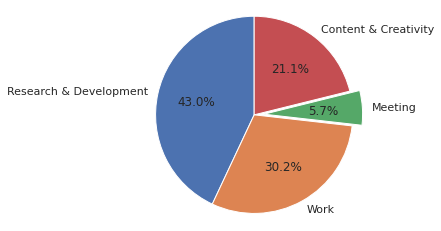

In [ ]:
pie_labels2 = 'Research & Development' , 'Work', 'Meeting', 'Content & Creativity'
sizes_labels2 = [114, 80,15, 56]
explode = (0,0,0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes_labels2, explode=explode, labels=pie_labels2, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df = df.set_index('Timestamp')
df.index = pd.to_datetime(df.index)

In [ ]:
df.head()

,Full Name,Phone Number,Sign-in Time,What are you working on today? (We ask this to understand what type of work is being done at The Hub),What equipment will you use?,Internet?,Sign-out Time (estimate),Are you a member of The Hub?,part_of_day
Timestamp,,,,,,,,,
2021-02-11,Kwanele Prince Tsabedze,7815 8606,2021-08-03 11:00:00,"FInancials, among other things",BYOC,Shared Hotspot,2021-08-03 06:00:00,Yes,Morning
2021-02-11,Simanga Ntsini,78501932,2021-08-03 04:00:00,EDITING VIDS,Desktop Workstation,Shared Hotspot,2021-08-03 17:00:00,Yes,Morning
2021-02-13,Simanga Ntsini,78501932,2021-08-03 11:00:00,Sharing videos to my platforms,Mac Workstation,Shared Hotspot,2021-08-03 17:00:00,Yes,Morning
2021-02-13,TygaDoesIt,+26879384734,2021-08-03 11:45:00,album art work,Own P.C,Shared Hotspot,2021-08-03 19:00:00,Yes,Morning
2021-02-14,Gcinimiyalo Ntuli,76342236,2021-08-03 12:56:00,Editing a video for my YouTube channel,Mac Workstation,Shared Hotspot,2021-08-03 16:38:00,Yes,Morning


In [ ]:
df9 = df.index.to_series()
df9 = df9.dt.dayofweek 
#headers = ['day of week']
#df9 = pd.DataFrame(df9, columns = headers)
df9.value_counts()

2    76
1    74
3    69
4    68
0    67
5    32
6    16
Name: Timestamp, dtype: int64

In [ ]:
days = ['Wed', 'Tue', 'Thurs', 'Fri', 'Mon', 'Sat', 'Sun']

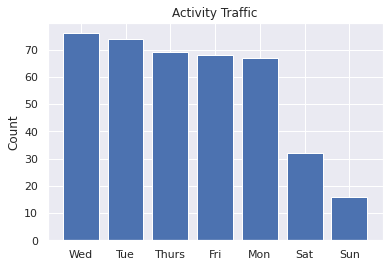

In [ ]:
%matplotlib inline
plt.bar(days, df9.value_counts());
#plt.xlabel("Days of week")
plt.ylabel("Count")
plt.title("Activity Traffic");

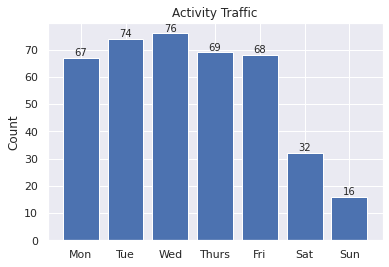

In [ ]:
%matplotlib inline
days = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
s = [67, 74, 76, 69, 68, 32, 16]
plt.bar(days, s)
plt.ylabel("Count")
plt.title("Activity Traffic");

for i in range(len(s)):
  plt.annotate(str(s[i]), xy=(days[i],s[i]), ha='center', va='bottom')

plt.show()

In [ ]:
print(pd.date_range(df.index.min(), df.index.max()).difference(df.index))

DatetimeIndex(['2021-02-12', '2021-02-17', '2021-02-19', '2021-02-20',
               '2021-02-25', '2021-03-02', '2021-03-06', '2021-03-08',
               '2021-03-11', '2021-03-14', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-24', '2021-03-28', '2021-04-03',
               '2021-04-05', '2021-04-09', '2021-04-10', '2021-04-18',
               '2021-04-25', '2021-04-26', '2021-05-01', '2021-05-02',
               '2021-05-08', '2021-05-09', '2021-05-15', '2021-06-06',
               '2021-06-13', '2021-06-17', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03',
               '2021-07-04', '2021-07-05', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-25', '2021-08-01',
               '2021-08-03'],
              dtype='datetime64[ns]', freq=None

In [ ]:
df5 = pd.date_range(df.index.min(), df.index.max()).difference(df.index)
df5.size

52

In [ ]:
df1 = date_groups.size().reset_index(name='Count')
print(df1)

              Timestamp  Count
0   2021-02-11 00:00:00      2
1   2021-02-13 00:00:00      2
2   2021-02-14 00:00:00      1
3   2021-02-15 00:00:00      4
4   2021-02-16 00:00:00      1
..                  ...    ...
117 2021-07-29 00:00:00      6
118 2021-07-30 00:00:00      3
119 2021-07-31 00:00:00      3
120 2021-08-02 00:00:00      2
121 2021-08-02 21:49:18      1

[122 rows x 2 columns]


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df1)

              Timestamp  Count
0   2021-02-11 00:00:00      2
1   2021-02-13 00:00:00      2
2   2021-02-14 00:00:00      1
3   2021-02-15 00:00:00      4
4   2021-02-16 00:00:00      1
5   2021-02-18 00:00:00      1
6   2021-02-21 00:00:00      2
7   2021-02-22 00:00:00      4
8   2021-02-23 00:00:00      2
9   2021-02-24 00:00:00      3
10  2021-02-26 00:00:00      4
11  2021-02-27 00:00:00      3
12  2021-02-28 00:00:00      2
13  2021-03-01 00:00:00      2
14  2021-03-03 00:00:00      2
15  2021-03-04 00:00:00      1
16  2021-03-05 00:00:00      4
17  2021-03-07 00:00:00      2
18  2021-03-09 00:00:00      1
19  2021-03-10 00:00:00      1
20  2021-03-12 00:00:00      3
21  2021-03-13 00:00:00      1
22  2021-03-15 00:00:00      1
23  2021-03-16 00:00:00      1
24  2021-03-17 00:00:00      8
25  2021-03-18 00:00:00      3
26  2021-03-22 00:00:00      1
27  2021-03-23 00:00:00      3
28  2021-03-25 00:00:00      1
29  2021-03-26 00:00:00      8
30  2021-03-27 00:00:00      2
31  2021

In [ ]:
df2 = df1[df1['Count'] < 3]['Timestamp']

In [ ]:
df1['Count'].describe()

count    122.000000
mean       3.245902
std        2.264755
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Count, dtype: float64

In [ ]:
df2.reset_index()

,index,Timestamp
0,0,2021-02-11 00:00:00
1,1,2021-02-13 00:00:00
2,2,2021-02-14 00:00:00
3,4,2021-02-16 00:00:00
4,5,2021-02-18 00:00:00
5,6,2021-02-21 00:00:00
6,8,2021-02-23 00:00:00
7,12,2021-02-28 00:00:00
8,13,2021-03-01 00:00:00
9,14,2021-03-03 00:00:00


In [ ]:
df1['Timestamp'].size

121

In [ ]:
df3 = df2.reset_index()

In [ ]:
df1['Timestamp']

0     2021-02-11
1     2021-02-13
2     2021-02-14
3     2021-02-15
4     2021-02-16
         ...    
116   2021-07-28
117   2021-07-29
118   2021-07-30
119   2021-07-31
120   2021-08-02
Name: Timestamp, Length: 121, dtype: datetime64[ns]

TypeError: ignored

In [ ]:
df2.head()

0   2021-02-11
1   2021-02-13
2   2021-02-14
4   2021-02-16
5   2021-02-18
Name: Timestamp, dtype: datetime64[ns]

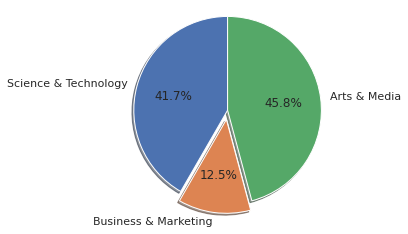

In [ ]:
pie_labels3 = 'Science & Technology' , 'Business & Marketing', 'Arts & Media'
sizes_labels3 = [10, 3,11]
explode = (0,0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes_labels3, explode=explode, labels=pie_labels3, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.set_title('Profession Demographics')

plt.show()

AttributeError: ignored

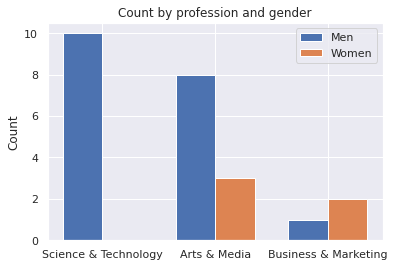

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Science & Technology', 'Arts & Media', 'Business & Marketing']
men_means = [10, 8, 1]
women_means = [0, 3, 2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count by profession and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rect in rects1.container
rects1.bar_label('Men',fmt='%.2f', label_type='edge')
rects2.bar

fig.tight_layout()

plt.show()

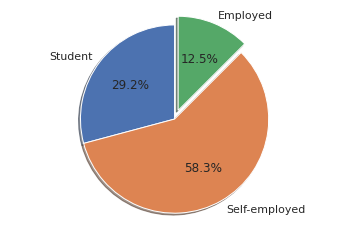

In [ ]:
pie_labels4 = 'Student' , 'Self-employed', 'Employed'
sizes_labels4 = [7, 14,3]
explode = (0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes_labels4, explode=explode, labels=pie_labels4, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

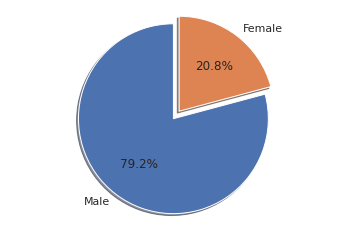

In [ ]:
pie_labels5 = 'Male' , 'Female'
sizes_labels5 = [19, 5]
explode = (0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes_labels5, explode=explode, labels=pie_labels5, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
%matplotlib inline
days = ['Wed', 'Tue', 'Thurs', 'Fri', 'Mon', 'Sat', 'Sun']
s = [76, 74, 69, 68, 67, 32, 16]
plt.bar(days, s)
plt.ylabel("Count")
plt.title("Activity Traffic");

for i in range(len(s)):
  plt.annotate(str(s[i]), xy=(days[i],s[i]), ha='center', va='bottom')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Science & Technology', 'Arts & Media', 'Business & Marketing']
men_means = [10, 8, 1]
women_means = [0, 3, 2]

#x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count by profession and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rect in rects1.container
rects1.bar_label('Men',fmt='%.2f', label_type='edge')
rects2.bar

fig.tight_layout()

plt.show()